<a href="https://colab.research.google.com/github/kushagrasharma-13/Python/blob/main/Linear_Regression_Bottle_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Bottle.csv', low_memory=False)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [4]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [5]:
def clean(x):
    #clearing columns with too many null values
    na = x.isna().sum()
    label = []
    for i in na.index:
        if na[i]>len(dataset)/2:
            label.append(i)
    x.drop(labels=label, inplace=True, axis=1)


    #finding columns with null values and filling them
    na = x.isna().sum() > 0
    for i in na.index:
        if na[i]:
            mean = x[i].mean()
            x[i] = x[i].fillna(mean)


clean(dataset)

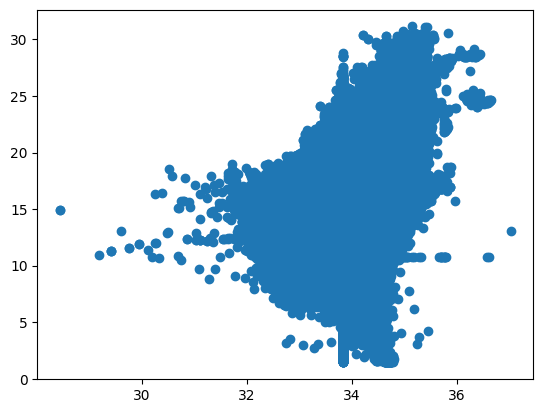

In [6]:
x = dataset[['Salnty']]
y = dataset['T_degC']
plt.scatter(x,y)
plt.show()

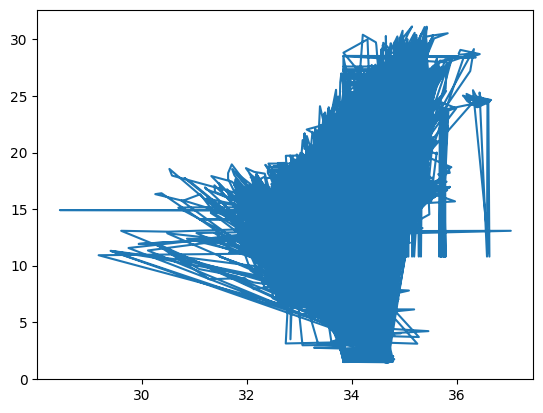

In [7]:
plt.plot(x,y)
plt.show()

In [8]:
n = len(dataset)
xy = 0
x_ = 0
y_ = 0
xx = 0
yy = 0
for i in range(n):
    x1 = dataset['Salnty'][i]
    y1 = dataset['T_degC'][i]
    xy += x1*y1
    x_ += x1
    y_ += y1
    xx += x1*x1
    yy += y1*y1

r = ((n*xy)-(x_*y_))/(((n*xx)-(x_*x_))*((n*yy)-(y_*y_)))
print("Linear Correlation between 'Salinty' and 'Temperature' is: ",r)

Linear Correlation between 'Salinty' and 'Temperature' is:  -3.4595392634687036e-13


In [9]:
x.shape

(864863, 1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [11]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(x_test)

In [13]:
print("Coefficient: ", lr.coef_[0])
print("Intercept: ", lr.intercept_)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2_Score: ", r2_score(y_test, y_pred))

Coefficient:  -4.588447580659579
Intercept:  166.07555353614873
Mean Squared Error:  13.517156133537718
R2_Score:  0.2413069156920563
